## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0721 18:02:09.152940 4436178368 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 18:02:09.176005 4436178368 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 18:02:09.181614 4436178368 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
"""
Compile 模型
"""
model.summary()

opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

W0721 18:02:42.299365 4436178368 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 18:02:42.310341 4436178368 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 18:02:43.593656 4436178368 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 18:02:43.692064 4436178368 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.8590 - acc: 0.3368 - val_loss: 1.7548 - val_acc: 0.3593
Epoch 2/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.6506 - acc: 0.4166 - val_loss: 1.7594 - val_acc: 0.3754
Epoch 3/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.5624 - acc: 0.4456 - val_loss: 1.5847 - val_acc: 0.4327
Epoch 4/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.4966 - acc: 0.4705 - val_loss: 1.4877 - val_acc: 0.4651
Epoch 5/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.4437 - acc: 0.4891 - val_loss: 1.5479 - val_acc: 0.4483
Epoch 6/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.4060 - acc: 0.4986 - val_loss: 1.5354 - val_acc: 0.4495
Epoch 7/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.3661 - acc: 0.5177 - val_loss: 1.4691 - 

50000/50000 [==============================] - 4s 87us/step - loss: 0.3084 - acc: 0.8906 - val_loss: 2.2468 - val_acc: 0.5245
Epoch 60/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.2900 - acc: 0.8993 - val_loss: 2.4428 - val_acc: 0.5117
Epoch 61/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2848 - acc: 0.8996 - val_loss: 2.2549 - val_acc: 0.5195
Epoch 62/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.2607 - acc: 0.9092 - val_loss: 2.3996 - val_acc: 0.5149
Epoch 63/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.2679 - acc: 0.9044 - val_loss: 2.4749 - val_acc: 0.5220
Epoch 64/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.2558 - acc: 0.9085 - val_loss: 2.4122 - val_acc: 0.5250
Epoch 65/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.2575 - acc: 0.9086 - val_loss: 2.4813 - val_acc: 0.5252
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0710 - acc: 0.9764 - val_loss: 3.5271 - val_acc: 0.5319
Epoch 119/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0570 - acc: 0.9807 - val_loss: 3.6229 - val_acc: 0.5335
Epoch 120/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0543 - acc: 0.9816 - val_loss: 3.6692 - val_acc: 0.5225
Epoch 121/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0652 - acc: 0.9776 - val_loss: 3.5981 - val_acc: 0.5260
Epoch 122/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0936 - acc: 0.9666 - val_loss: 3.7011 - val_acc: 0.5241
Epoch 123/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.1520 - acc: 0.9463 - val_loss: 3.5149 - val_acc: 0.5324
Epoch 124/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.0829 - acc: 0.9707 - val_loss: 3.7030 - val_acc: 0.5188
Epoch 125/500
50000/

Epoch 176/500
50000/50000 [==============================] - 5s 91us/step - loss: 3.7816e-04 - acc: 1.0000 - val_loss: 4.0274 - val_acc: 0.5516
Epoch 177/500
50000/50000 [==============================] - 5s 92us/step - loss: 3.7940e-04 - acc: 1.0000 - val_loss: 4.0324 - val_acc: 0.5510
Epoch 178/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.7103e-04 - acc: 1.0000 - val_loss: 4.0323 - val_acc: 0.5513
Epoch 179/500
50000/50000 [==============================] - 5s 92us/step - loss: 3.6154e-04 - acc: 1.0000 - val_loss: 4.0370 - val_acc: 0.5506
Epoch 180/500
50000/50000 [==============================] - 5s 91us/step - loss: 3.5488e-04 - acc: 1.0000 - val_loss: 4.0394 - val_acc: 0.5509
Epoch 181/500
50000/50000 [==============================] - 5s 93us/step - loss: 3.5144e-04 - acc: 1.0000 - val_loss: 4.0437 - val_acc: 0.5505
Epoch 182/500
50000/50000 [==============================] - 5s 94us/step - loss: 3.4333e-04 - acc: 1.0000 - val_loss: 4.0420 - val_acc:

50000/50000 [==============================] - 5s 94us/step - loss: 2.0377e-04 - acc: 1.0000 - val_loss: 4.1296 - val_acc: 0.5513
Epoch 233/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.0210e-04 - acc: 1.0000 - val_loss: 4.1291 - val_acc: 0.5513
Epoch 234/500
50000/50000 [==============================] - 5s 91us/step - loss: 2.0068e-04 - acc: 1.0000 - val_loss: 4.1303 - val_acc: 0.5514
Epoch 235/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.9933e-04 - acc: 1.0000 - val_loss: 4.1310 - val_acc: 0.5516
Epoch 236/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.9743e-04 - acc: 1.0000 - val_loss: 4.1340 - val_acc: 0.5513
Epoch 237/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.9584e-04 - acc: 1.0000 - val_loss: 4.1365 - val_acc: 0.5506
Epoch 238/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.9465e-04 - acc: 1.0000 - val_loss: 4.1362 - val_acc: 0.5506
Epoch 

Epoch 289/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.4271e-04 - acc: 1.0000 - val_loss: 4.1861 - val_acc: 0.5517
Epoch 290/500
50000/50000 [==============================] - 5s 104us/step - loss: 1.4206e-04 - acc: 1.0000 - val_loss: 4.1871 - val_acc: 0.5514
Epoch 291/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.4158e-04 - acc: 1.0000 - val_loss: 4.1894 - val_acc: 0.5519
Epoch 292/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.4101e-04 - acc: 1.0000 - val_loss: 4.1897 - val_acc: 0.5514
Epoch 293/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.4027e-04 - acc: 1.0000 - val_loss: 4.1914 - val_acc: 0.5510
Epoch 294/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3924e-04 - acc: 1.0000 - val_loss: 4.1900 - val_acc: 0.5520
Epoch 295/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3866e-04 - acc: 1.0000 - val_loss: 4.1917 - v

50000/50000 [==============================] - 5s 108us/step - loss: 1.1158e-04 - acc: 1.0000 - val_loss: 4.2279 - val_acc: 0.5520
Epoch 346/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1106e-04 - acc: 1.0000 - val_loss: 4.2287 - val_acc: 0.5519
Epoch 347/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1058e-04 - acc: 1.0000 - val_loss: 4.2287 - val_acc: 0.5521
Epoch 348/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.1016e-04 - acc: 1.0000 - val_loss: 4.2305 - val_acc: 0.5516
Epoch 349/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.0959e-04 - acc: 1.0000 - val_loss: 4.2309 - val_acc: 0.5519
Epoch 350/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.0947e-04 - acc: 1.0000 - val_loss: 4.2323 - val_acc: 0.5517
Epoch 351/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.0892e-04 - acc: 1.0000 - val_loss: 4.2312 - val_acc: 0.5519

50000/50000 [==============================] - 5s 105us/step - loss: 9.2085e-05 - acc: 1.0000 - val_loss: 4.2594 - val_acc: 0.5523
Epoch 402/500
50000/50000 [==============================] - 5s 104us/step - loss: 9.1501e-05 - acc: 1.0000 - val_loss: 4.2600 - val_acc: 0.5521
Epoch 403/500
50000/50000 [==============================] - 5s 102us/step - loss: 9.1234e-05 - acc: 1.0000 - val_loss: 4.2629 - val_acc: 0.5513
Epoch 404/500
50000/50000 [==============================] - 5s 103us/step - loss: 9.1053e-05 - acc: 1.0000 - val_loss: 4.2629 - val_acc: 0.5513
Epoch 405/500
50000/50000 [==============================] - 5s 107us/step - loss: 9.0543e-05 - acc: 1.0000 - val_loss: 4.2626 - val_acc: 0.5525
Epoch 406/500
50000/50000 [==============================] - 5s 104us/step - loss: 9.0384e-05 - acc: 1.0000 - val_loss: 4.2633 - val_acc: 0.5522
Epoch 407/500
50000/50000 [==============================] - 5s 108us/step - loss: 9.0042e-05 - acc: 1.0000 - val_loss: 4.2642 - val_acc: 0.5517

50000/50000 [==============================] - 7s 134us/step - loss: 7.8119e-05 - acc: 1.0000 - val_loss: 4.2862 - val_acc: 0.5524
Epoch 458/500
50000/50000 [==============================] - 5s 109us/step - loss: 7.8070e-05 - acc: 1.0000 - val_loss: 4.2880 - val_acc: 0.5522
Epoch 459/500
50000/50000 [==============================] - 6s 119us/step - loss: 7.7821e-05 - acc: 1.0000 - val_loss: 4.2889 - val_acc: 0.5518
Epoch 460/500
50000/50000 [==============================] - 5s 109us/step - loss: 7.7604e-05 - acc: 1.0000 - val_loss: 4.2893 - val_acc: 0.5518
Epoch 461/500
50000/50000 [==============================] - 5s 109us/step - loss: 7.7407e-05 - acc: 1.0000 - val_loss: 4.2893 - val_acc: 0.5520
Epoch 462/500
50000/50000 [==============================] - 5s 106us/step - loss: 7.7080e-05 - acc: 1.0000 - val_loss: 4.2891 - val_acc: 0.5512
Epoch 463/500
50000/50000 [==============================] - 6s 119us/step - loss: 7.7015e-05 - acc: 1.0000 - val_loss: 4.2909 - val_acc: 0.5520

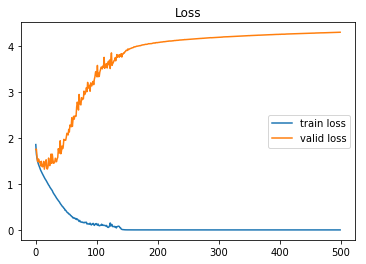

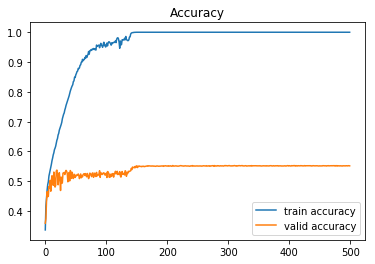

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()